# Another Package for Data Collection: yfinance

- References
    - https://pypi.org/project/yfinance/

In [1]:
%%capture

!pip install yfinance

import yfinance as yf

## Example 1: Daily Data for Single Asset

In [2]:
sp500 = yf.download("^GSPC", start = "2020-01-01")
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2021-06-28,4284.899902,4292.140137,4274.669922,4290.609863,4290.609863,3415610000
2021-06-29,4293.209961,4300.520020,4287.040039,4291.799805,4291.799805,3049560000
2021-06-30,4290.649902,4302.430176,4287.959961,4297.500000,4297.500000,3687880000


## Example 2: Multiple Assets

In [3]:
faang = yf.download("fb, aapl, amzn, nflx, goog", start = "2020-01-01")
faang

[*********************100%***********************]  5 of 5 completed


Adj Close                           ...    Volume                  
                  AAPL         AMZN          FB  ...        FB     GOOG     NFLX
Date                                             ...                            
2020-01-02   74.207466  1898.010010  209.779999  ...  12077100  1406600  4485800
2020-01-03   73.486023  1874.969971  208.669998  ...  11188400  1186400  3806900
2020-01-06   74.071579  1902.880005  212.600006  ...  17058900  1732300  5663100
2020-01-07   73.723213  1906.859985  213.059998  ...  14912400  1502700  4703200
2020-01-08   74.909149  1891.969971  215.220001  ...  13475000  1528000  7104500
...                ...          ...         ...  ...       ...      ...      ...
2021-06-28  134.779999  3443.889893  355.640015  ...  29156100  1405500  2820200
2021-06-29  136.330002  3448.139893  351.890015  ...  21417300  1047500  2314600
2021-06-30  136.960007  3440.159912  347.709991  ...  15107500  1200300  2773400
2021-07-01  137.270004  3432.969971  354.390015  ...  17137000   856000  2805400
2021-07-02  139.960007  3510.979980  354.700012  ...  11521300  1058000  1975500

[379 rows x 30 columns]

In [4]:
tbl = faang["Adj Close"]
tbl

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-01-02,74.207466,1898.010010,209.779999,1367.369995,329.809998
2020-01-03,73.486023,1874.969971,208.669998,1360.660034,325.899994
2020-01-06,74.071579,1902.880005,212.600006,1394.209961,335.829987
2020-01-07,73.723213,1906.859985,213.059998,1393.339966,330.750000
2020-01-08,74.909149,1891.969971,215.220001,1404.319946,339.260010
...,...,...,...,...,...
2021-06-28,134.779999,3443.889893,355.640015,2536.389893,533.030029
2021-06-29,136.330002,3448.139893,351.890015,2520.370117,533.500000
2021-06-30,136.960007,3440.159912,347.709991,2506.320068,528.210022


## Example 3: Group by Ticker

In [5]:
semicon = yf.download("USDTWD=X, BTC-USD", group_by = "tickers", period = "ytd")
semicon

[*********************100%***********************]  2 of 2 completed


BTC-USD                ...   USDTWD=X       
                    Open          High  ...  Adj Close Volume
Date                                    ...                  
2021-01-01  28994.009766  29600.626953  ...  28.078699    0.0
2021-01-02  29376.455078  33155.117188  ...        NaN    NaN
2021-01-03  32129.408203  34608.558594  ...        NaN    NaN
2021-01-04  32810.949219  33440.218750  ...  28.054001    0.0
2021-01-05  31977.041016  34437.589844  ...  28.101000    0.0
...                  ...           ...  ...        ...    ...
2021-06-29  34475.558594  36542.109375  ...  27.816000    0.0
2021-06-30  35908.386719  36074.757812  ...  27.875900    0.0
2021-07-01  35035.984375  35035.984375  ...  27.818001    0.0
2021-07-02  33549.601562  33939.589844  ...  27.879000    0.0
2021-07-03  33888.457031  33888.457031  ...        NaN    NaN

[184 rows x 12 columns]

In [6]:
semicon["USDTWD=X"]["Close"]

Date
2021-01-01    28.078699
2021-01-02          NaN
2021-01-03          NaN
2021-01-04    28.054001
2021-01-05    28.101000
                ...    
2021-06-29    27.816000
2021-06-30    27.875900
2021-07-01    27.818001
2021-07-02    27.879000
2021-07-03          NaN
Freq: D, Name: Close, Length: 184, dtype: float64

## Example 4: Ticker

In [7]:
tsla = yf.Ticker("tsla")

In [8]:
tsla.info

{'52WeekChange': 1.4713104,
 'SandP52WeekChange': 0.35859132,
 'address1': '3500 Deer Creek Road',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 677.7,
 'askSize': 900,
 'averageDailyVolume10Day': 26587957,
 'averageVolume': 28681619,
 'averageVolume10days': 26587957,
 'beta': 1.995108,
 'beta3Year': None,
 'bid': 677,
 'bidSize': 1000,
 'bookValue': 23.901,
 'category': None,
 'circulatingSupply': None,
 'city': 'Palo Alto',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1623715200,
 'dayHigh': 700,
 'dayLow': 673.26,
 'dividendRate': None,
 'dividendYield': None,
 'earningsQuarterlyGrowth': 26.375,
 'enterpriseToEbitda': 142.799,
 'enterpriseToRevenue': 18.082,
 'enterpriseValue': 649878962176,
 'exDividendDate': None,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 618.5894,
 'fiftyTwoWeekHigh

### Intraday Data

In [9]:
tbl = tsla.history(period = "1d", interval = "1m")
tbl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-07-02 09:30:00-04:00,681.140930,681.140930,680.989990,681.140930,1138922,0,0
2021-07-02 09:31:00-04:00,680.940002,681.559998,680.510010,681.419983,37056,0,0
2021-07-02 09:33:00-04:00,687.760010,688.409302,687.634094,688.030029,869567,0,0
2021-07-02 09:34:00-04:00,688.190002,688.530029,686.859985,687.044983,188808,0,0
2021-07-02 09:35:00-04:00,687.049988,688.500000,685.450012,688.419983,280162,0,0
...,...,...,...,...,...,...,...
2021-07-02 15:56:00-04:00,678.739990,679.056274,678.549988,678.900085,83675,0,0
2021-07-02 15:57:00-04:00,678.892883,679.150024,678.880005,679.130005,81640,0,0
2021-07-02 15:58:00-04:00,679.150024,679.229980,678.549988,678.619995,101190,0,0


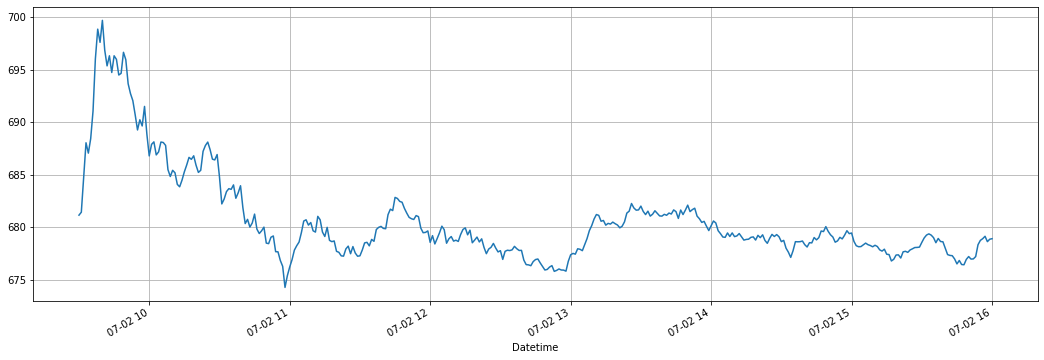

In [10]:
tbl["Close"].plot.line(figsize = (18, 6), grid = True)